a. Generazione del DatasetGenerare un dataset composto da 1000 campioni secondo il seguente modello:L'ipotesi $Y \in \{0,1\}$ è distribuita uniformemente: $P[Y = 0] = 1/2$.Le feature $X$ sono scalari, con distribuzione Gaussiana condizionata all'ipotesi:


$\ell(x|Y = 0) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right)$ (ovvero $X|Y=0 \sim \mathcal{N}(0,1)$)


$\ell(x|Y = 1) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(x-1)^2}{2}\right)$ (ovvero $X|Y=1 \sim \mathcal{N}(1,1)$)

(You can use the function ”choice” in the ”random” package of numpy to generate realizations of Y ).


In [2]:
import numpy as np
Y=np.random.choice([0,1], size=1000, replace=True, p=[0.5,0.5]) 
#il replace=True indica che ogni valore può essere scelto più volte
count0=np.sum(Y==0)
print(count0)
count1=np.sum(Y==1)
print(count1)







509
491


[-3.14616715e+00 -3.13913957e+00 -3.13211198e+00 -3.12508440e+00
 -3.11805681e+00 -3.11102922e+00 -3.10400164e+00 -3.09697405e+00
 -3.08994647e+00 -3.08291888e+00 -3.07589130e+00 -3.06886371e+00
 -3.06183612e+00 -3.05480854e+00 -3.04778095e+00 -3.04075337e+00
 -3.03372578e+00 -3.02669820e+00 -3.01967061e+00 -3.01264302e+00
 -3.00561544e+00 -2.99858785e+00 -2.99156027e+00 -2.98453268e+00
 -2.97750510e+00 -2.97047751e+00 -2.96344992e+00 -2.95642234e+00
 -2.94939475e+00 -2.94236717e+00 -2.93533958e+00 -2.92831200e+00
 -2.92128441e+00 -2.91425682e+00 -2.90722924e+00 -2.90020165e+00
 -2.89317407e+00 -2.88614648e+00 -2.87911889e+00 -2.87209131e+00
 -2.86506372e+00 -2.85803614e+00 -2.85100855e+00 -2.84398097e+00
 -2.83695338e+00 -2.82992579e+00 -2.82289821e+00 -2.81587062e+00
 -2.80884304e+00 -2.80181545e+00 -2.79478787e+00 -2.78776028e+00
 -2.78073269e+00 -2.77370511e+00 -2.76667752e+00 -2.75964994e+00
 -2.75262235e+00 -2.74559477e+00 -2.73856718e+00 -2.73153959e+00
 -2.72451201e+00 -2.71748

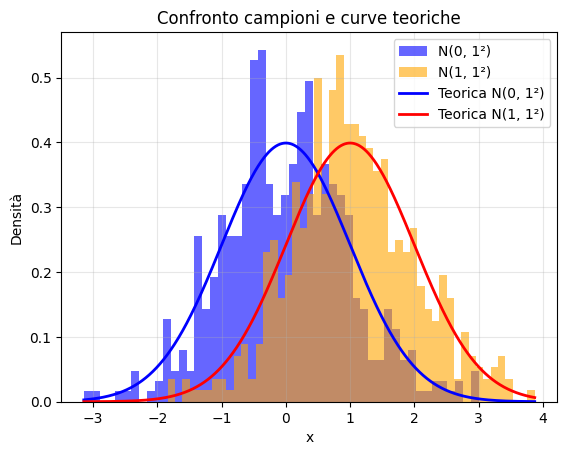

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sigma = 1
avg0 = 0
avg1 = 1

# PRIMA genera i campioni (norm0 e norm1)
norm0 = np.random.normal(avg0, sigma, size=count0)
norm1 = np.random.normal(avg1, sigma, size=count1)
# POI crea l'array x per le curve teoriche (dopo aver generato i campioni)
x = np.linspace(min(norm0.min(), norm1.min()), 
                max(norm0.max(), norm1.max()), 1000)
# Plotta istogrammi
plt.hist(norm0, bins=50, alpha=0.6, label=f'N({avg0}, {sigma}²)', density=True, color='blue')
plt.hist(norm1, bins=50, alpha=0.6, label=f'N({avg1}, {sigma}²)', density=True, color='orange')

# Plotta curve teoriche
plt.plot(x, norm.pdf(x, loc=avg0, scale=sigma), 
         'b-', linewidth=2, label=f'Teorica N({avg0}, {sigma}²)')
plt.plot(x, norm.pdf(x, loc=avg1, scale=sigma), 
         'r-', linewidth=2, label=f'Teorica N({avg1}, {sigma}²)')

plt.xlabel('x')
plt.ylabel('Densità')
plt.legend()
plt.title('Confronto campioni e curve teoriche')
plt.grid(True, alpha=0.3)
plt.show()

b. Implement the MAP classifier and compute its empirical error probability with a Monte Carlo simulation over the samples generated
at point a. Compute the theoretical error probability of the MAP classifier and compare it against the empirical one.
Il punto ciritco del classificatore MAP è 0.5
1-Prendiamo i valori di X che abbiamo generato.
2-Applichiamo la regola del se il valore x>0.5 allora la y appartiene alla classe 1, altrimenti alla classe 0
3-Si confronta con le etichette Y reali e si verifica il numero di sbagli


In [11]:
x = np.zeros(1000)
# Maschera per la classe 0
mask0 = (Y == 0)
# Assegniamo i valori casuali solo dove la maschera è True
x[mask0] = np.random.normal(loc=0, scale=1, size=np.sum(mask0))
print(x[mask0])


[ 3.11726914e+00  9.58951090e-01 -6.23027791e-01 -2.48202712e-01
 -2.91120238e+00 -1.03016646e+00 -6.14608580e-01  1.28315811e+00
 -2.17883479e+00  1.95557489e+00  7.55226810e-01 -1.26295996e+00
 -8.53766281e-01  1.17232670e+00 -1.99023402e-01 -6.85837344e-01
  7.26715475e-01 -4.25907362e-01  5.15675174e-01  4.45785789e-01
 -4.12935992e-01 -1.75641798e-02 -1.25126613e+00 -1.83374054e-01
  1.23469091e+00 -4.60944518e-01 -1.20291264e+00  8.19557397e-01
 -7.82170167e-01 -6.31983410e-01  5.36034024e-01 -7.76572391e-01
  1.14713841e+00  1.15055459e-01  8.36825386e-01 -1.98593785e-01
 -4.31971908e-01  8.73871683e-01  7.55749511e-01 -7.30337723e-01
  3.84867441e-01 -1.21525195e+00 -2.97272755e-01  2.14374503e+00
  1.41343665e+00 -9.37627808e-01  6.45309055e-01  1.23893888e+00
  1.56297418e-01  2.34121280e+00 -1.08175217e+00  2.79717316e-03
 -1.60161940e+00  1.35169361e+00  6.55874013e-01 -1.30954350e+00
  4.76520230e-02 -5.95519239e-02  6.22611608e-02  7.93419534e-01
 -2.45147911e-01  6.12671